In [7]:
import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname(""), '..', 'Lime_NDT')))
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname(""), '..')))

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from Lime_NDT.lime_tabular import LimeTabularExplainer
from Lime_NDT.utils.ndt_sklearn_wrapper import NDTRegressorWrapper

# Charger le dataset diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target  # Cible de régression

# Séparer en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Entraîner le modèle global Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Fonction de prédiction globale utilisant le Random Forest
def predict_fn(X):
    return rf.predict(X)

# Créer l'explainer LIME
explainer = LimeTabularExplainer(
    X_train,
    feature_names=diabetes.feature_names,
    class_names=None,
    discretize_continuous=True,
    mode='regression',    
)

# Créer le modèle local NDT
model_regressor = NDTRegressorWrapper(gammas=[1,1], D=X_train.shape[1], max_depth=4)

# Expliquer une instance
exp = explainer.explain_instance(
    X_test[0],
    predict_fn,
    num_features=10,
    model_regressor=model_regressor
)

print("Explication locale (feature, poids):")
print(exp.as_list())

mean_leaf_values shape: (32, 1, 1)
self.L: 32 self.C: 1
mean_leaf_values shape after squeeze: (32, 1)


c:\Users\DELL\Desktop\Lime_NDT\.venv\lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Explication locale (feature, poids):
[('-0.04 < bp <= -0.01', 0.16129032258064516), ('s1 > 0.03', 0.12903225806451613), ('age > 0.04', 0.12903225806451613), ('s2 > 0.03', 0.12903225806451613), ('-0.00 < s4 <= 0.03', 0.12903225806451613), ('-0.01 < s3 <= 0.03', 0.0967741935483871), ('-0.00 < s5 <= 0.03', 0.06451612903225806), ('sex <= -0.04', 0.06451612903225806), ('-0.03 < s6 <= 0.00', 0.06451612903225806), ('-0.03 < bmi <= -0.01', 0.03225806451612903)]


In [12]:
from lime.lime_tabular import LimeTabularExplainer

# Créer l'explainer LIME officiel
explainer_lime = LimeTabularExplainer(
    X_train,
    feature_names=diabetes.feature_names,
    class_names=None,
    discretize_continuous=True,
    mode='regression',
)

# Expliquer une instance avec le modèle local Ridge par défaut de LIME
exp_ridge = explainer_lime.explain_instance(
    X_test[10],
    predict_fn,
    num_features=10
)

print("\nExplication locale avec Ridge (LIME officiel) (feature, poids):")
print(exp_ridge.as_list())


Explication locale avec Ridge (LIME officiel) (feature, poids):
[('bmi <= -0.03', -35.7240624770686), ('-0.03 < s5 <= -0.00', -16.90666866914131), ('s3 > 0.03', -10.317298454816104), ('-0.04 < bp <= -0.01', -7.279864352566179), ('age <= -0.03', -4.66372533863615), ('s1 > 0.03', -4.382823095196497), ('-0.04 < s4 <= -0.00', -3.797991329223568), ('sex <= -0.04', 2.981316909631697), ('s2 > 0.03', -1.1844676675953225), ('s6 <= -0.03', -0.9443033804719158)]


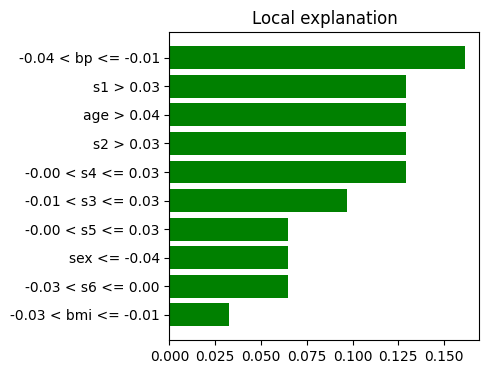

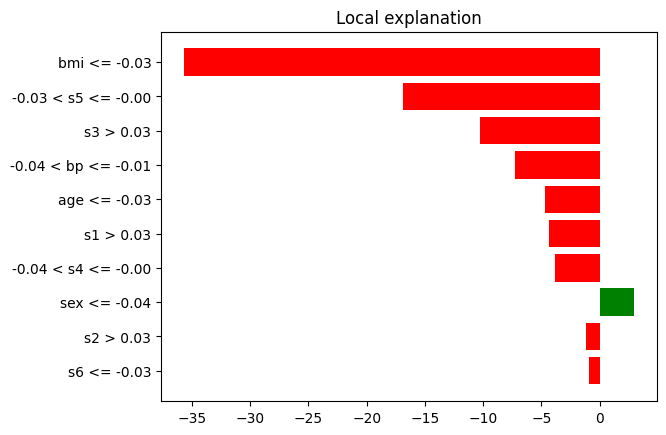

In [13]:
import matplotlib.pyplot as plt

exp.as_pyplot_figure()
plt.show()

exp_ridge.as_pyplot_figure()
plt.show()